In [112]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(scales)
options(repr.matrix.max.rows = 6)

In [113]:
players <- read_csv("https://raw.githubusercontent.com/tiffyue/dsci_100_project/refs/heads/main/data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [114]:
# Wrangling dataset to compensate for missing observations in Age
players_data <- players |>
     filter(!is.na(Age)) 


# mean of all the quantitative data (played_hours and Age)

mean_players <- players_data |>
    select(played_hours, Age) 
    

mean_players

played_hours,Age
<dbl>,<dbl>
30.3,9
3.8,17
0.0,17
⋮,⋮
0.3,22
0.0,17
2.3,17


| Quantitative Player Data  | Mean
|--------------|-----
| played_hours | 5.90
| Age          | 20.5

`summarise()` has grouped output by 'experience', 'subscribe'. You can override
using the `.groups` argument.


experience,subscribe,played_hours,Age
<chr>,<lgl>,<dbl>,<dbl>
Regular,TRUE,0.3,8
Pro,TRUE,30.3,9
Regular,TRUE,3.6,10
⋮,⋮,⋮,⋮
Beginner,FALSE,0.2,37
Veteran,TRUE,0.2,38
Regular,TRUE,18.5,49


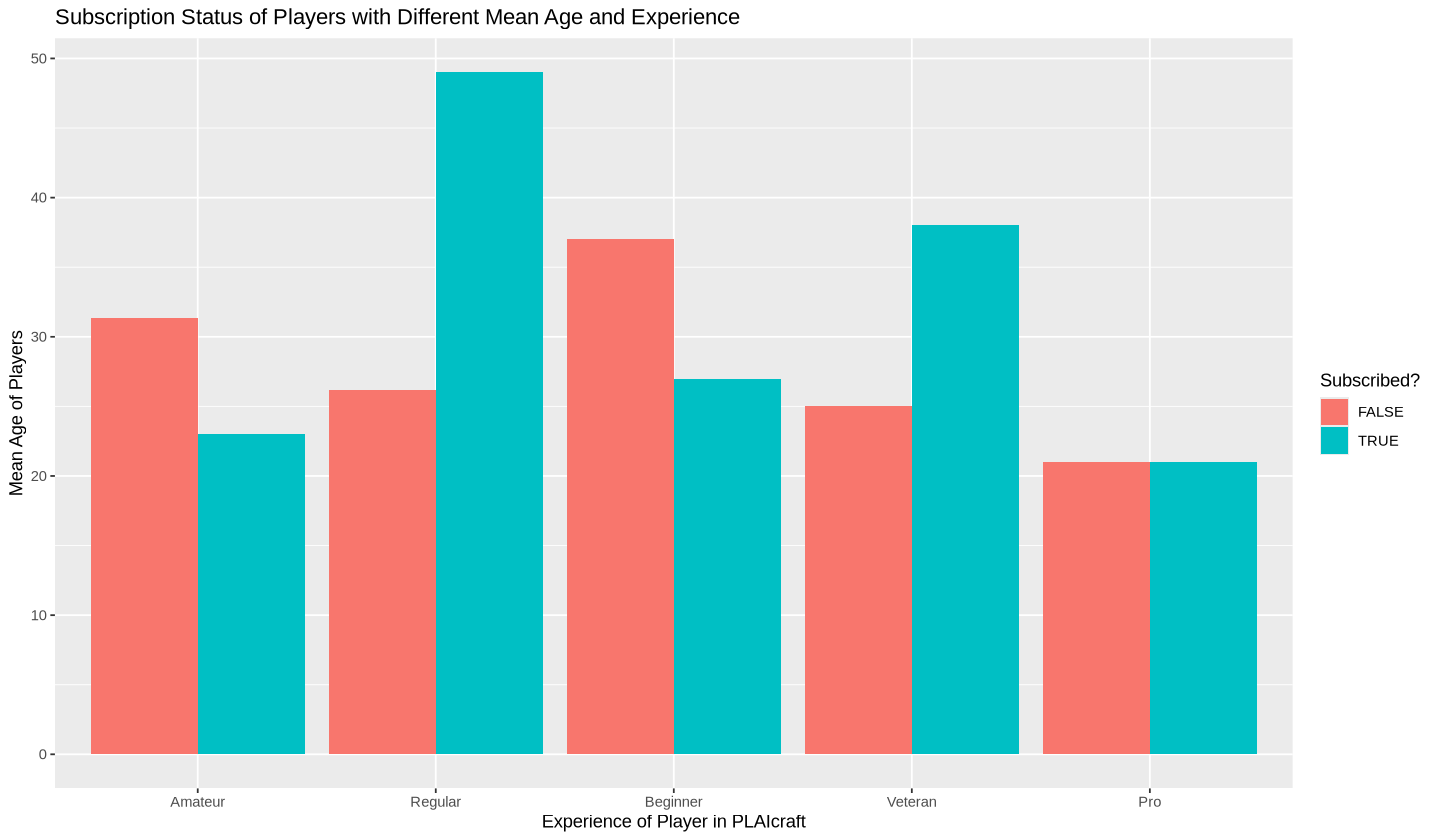

In [115]:
# 1: Explore how the experience of the player based on mean Age and how it relates to subscription status

mean_age_players <- players_data |>
    group_by(experience, subscribe, played_hours) |>
    summarize(Age = mean(Age, na.rm = TRUE)) |>
    arrange(Age)

mean_age_players


player_rank_subscription <- mean_age_players |>
    ggplot(aes(x = fct_reorder(experience, played_hours, .desc = TRUE), y = Age, fill = as_factor(subscribe))) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Experience of Player in PLAIcraft", y = "Mean Age of Players",
         fill = "Subscribed?", title = "Subscription Status of Players with Different Mean Age and Experience")

player_rank_subscription

#### Analysis # 1 ####

"Regular" are the oldest amongst the mean age and has highest subscriptions. Pros are around equal, but it seems that players in the 20-40 range are more likely to not subscribe other than "Veteran" 

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,played_hours
<chr>,<lgl>,<dbl>
Regular,TRUE,23.400000
Amateur,TRUE,8.277778
Pro,TRUE,3.766667
⋮,⋮,⋮
Veteran,FALSE,0.50666667
Amateur,FALSE,0.36666667
Regular,FALSE,0.02857143


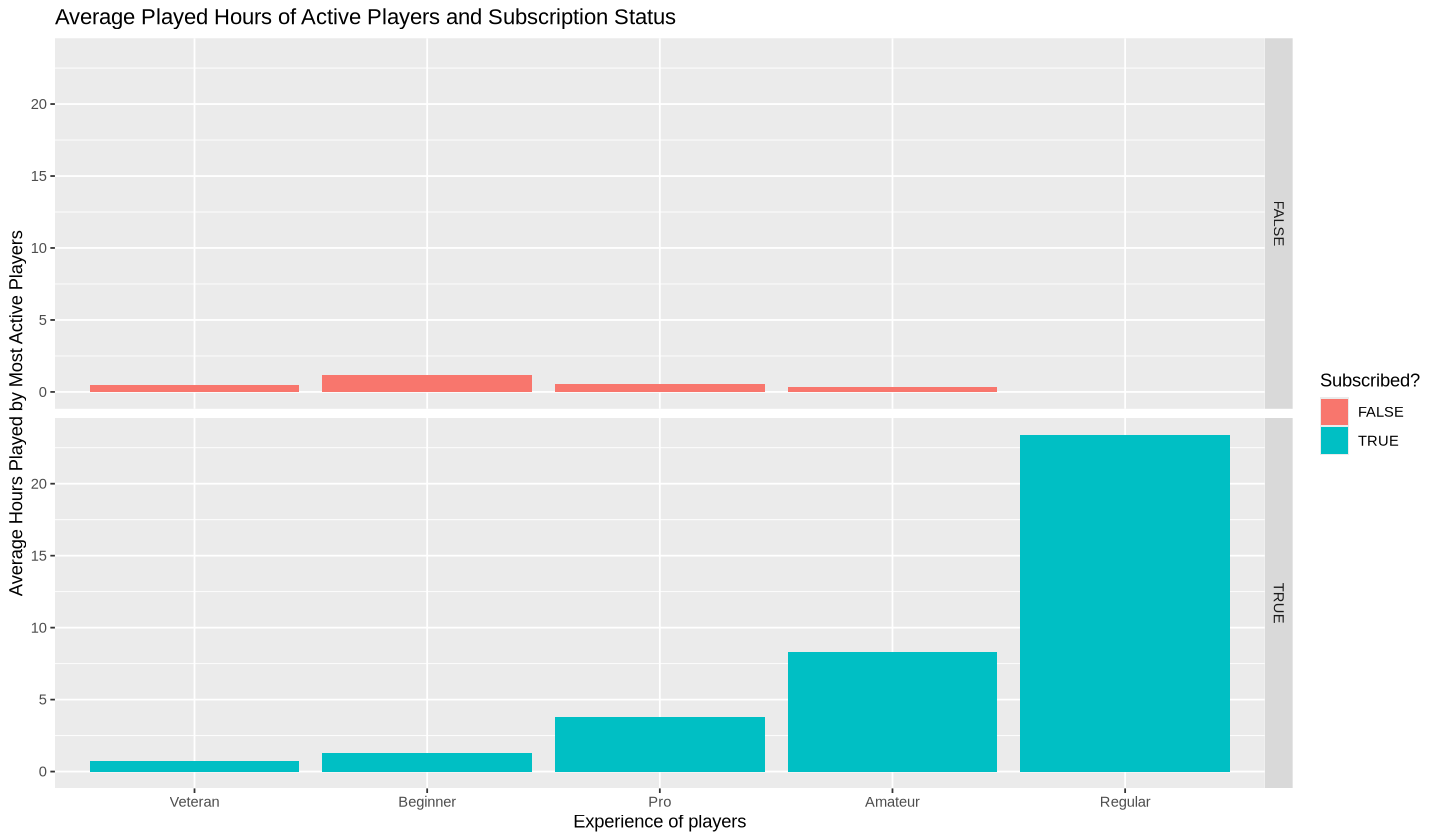

In [116]:
# 2: Explore the average time a player interacts with the game based on their experience to determine subscription status
active_players <- players_data |>
    group_by(experience, subscribe) |>
    summarize(played_hours = mean(played_hours, na.rm = TRUE)) |>
    arrange(desc(played_hours))

active_players

average_time_players <- active_players |>
    ggplot(aes(x = fct_reorder(experience,played_hours),  y= played_hours,fill = as_factor(subscribe))) +
    geom_bar(stat = "identity") +
    facet_grid(rows = vars(subscribe)) +
    labs(x = "Experience of players", y = "Average Hours Played by Most Active Players", fill = "Subscribed?",
        title = "Average Played Hours of Active Players and Subscription Status") 
      
average_time_players

#### Analysis # 2 ####

Regular players average the most hours and have the highest subscription density. Some novice players log long hours, often subscribing, except "Beginners" who mostly don't. Experienced players average fewer hours than some novices and are less subscribed.

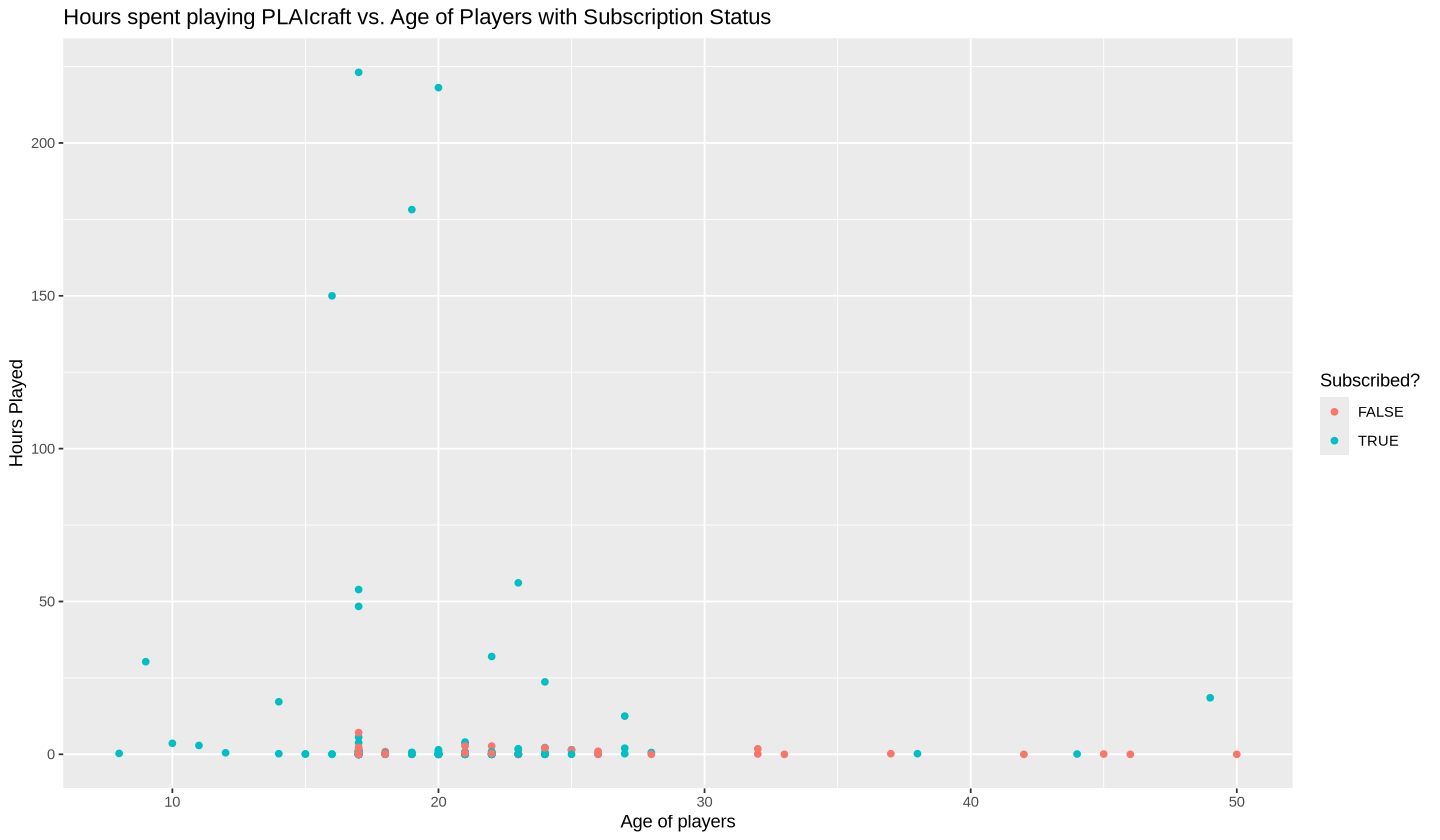

In [117]:
# 3: Exploring the Relationship between Age and played_hours to determine subscription status
options(repr.plot.width = 12, repr.plot.height = 7)

players_age_hours_plot <- players_data |>
    ggplot(aes(x = Age,  y= played_hours ,color = as_factor(subscribe))) +
    geom_point() +
    labs(x = "Age of players", y = "Hours Played", color = "Subscribed?",
        title = "Hours spent playing PLAIcraft vs. Age of Players with Subscription Status") 
      
players_age_hours_plot

#### Analysis # 3 ####

Most players are around 10 - 30 years old and has the highest recored hours played that exceeds 150 hours. Most of the plots are blue, indicating that a marjority of the players are subscribed.  

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,played_hours
<chr>,<lgl>,<dbl>
Regular,TRUE,223.1
Amateur,TRUE,150.0
Pro,TRUE,30.3
⋮,⋮,⋮
Amateur,FALSE,2.3
Pro,FALSE,1.7
Regular,FALSE,0.1


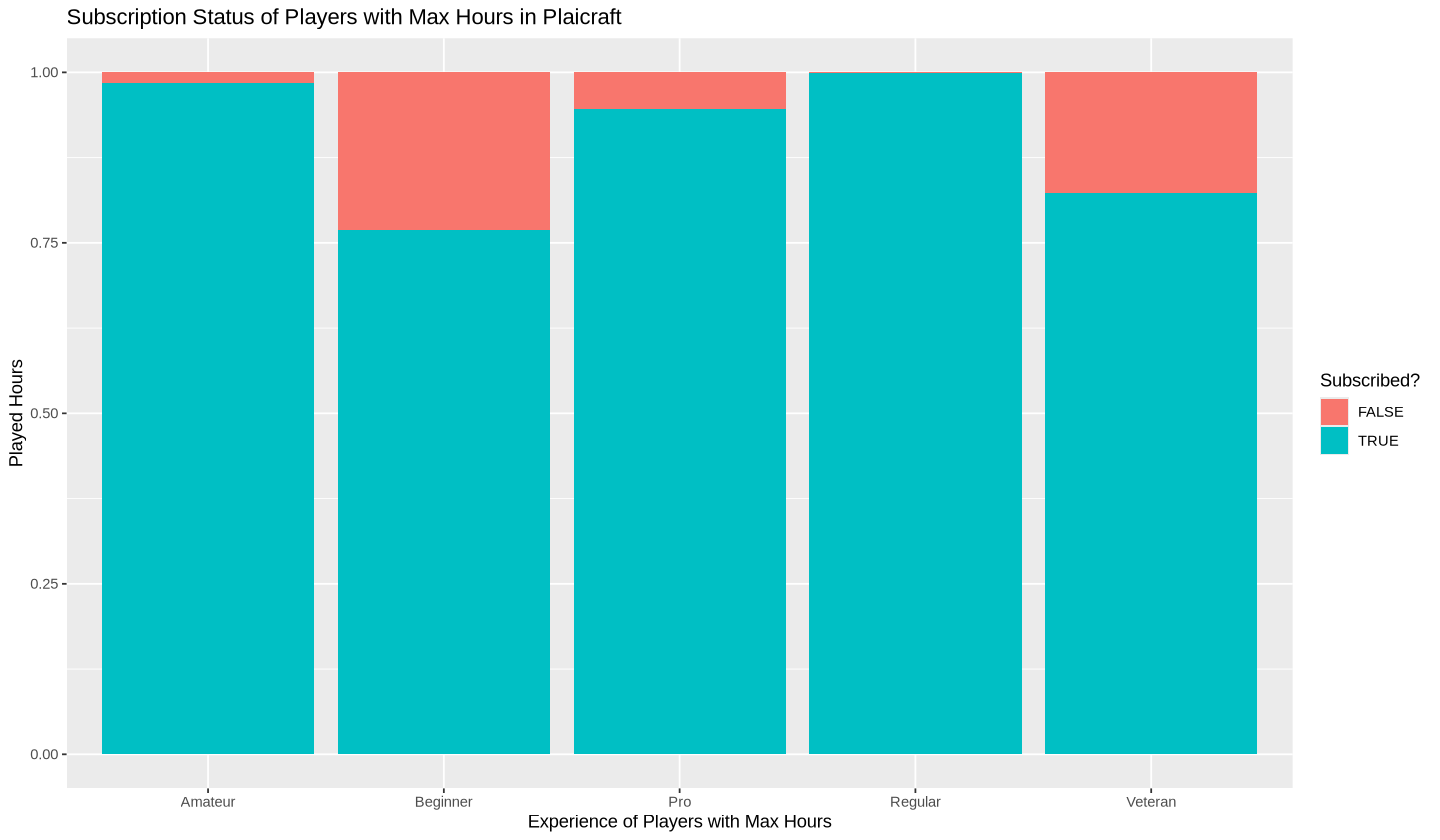

In [118]:
# 4 Comparing the subscription status between players with max hours in subscription status

max_players <- players_data |>
    group_by(experience, subscribe) |>
    summarize(played_hours = max(played_hours, na.rm = TRUE)) |>
    arrange(desc(played_hours))
    
max_players

max_players_plot <- max_players |>
    ggplot(aes(x = experience, y = played_hours, fill = subscribe)) +
    geom_bar(stat = "identity", position = "fill") +
    labs(x = "Experience of Players with Max Hours", y = "Played Hours", 
         fill = "Subscribed?", title = "Subscription Status of Players with Max Hours in Plaicraft")
max_players_plot

#### Analysis # 4 ####

Regular players with maximum hours are fully subscribed, followed closely by Amateurs and Pros. Beginners and Veterans show some non-subscribers, but they comprise only about 25% of the total.

played_hours,experience,subscribe
<dbl>,<chr>,<lgl>
0.1,Regular,TRUE
0.1,Amateur,TRUE
0.1,Amateur,FALSE
⋮,⋮,⋮
1,Beginner,TRUE
1,Beginner,TRUE
1,Amateur,FALSE


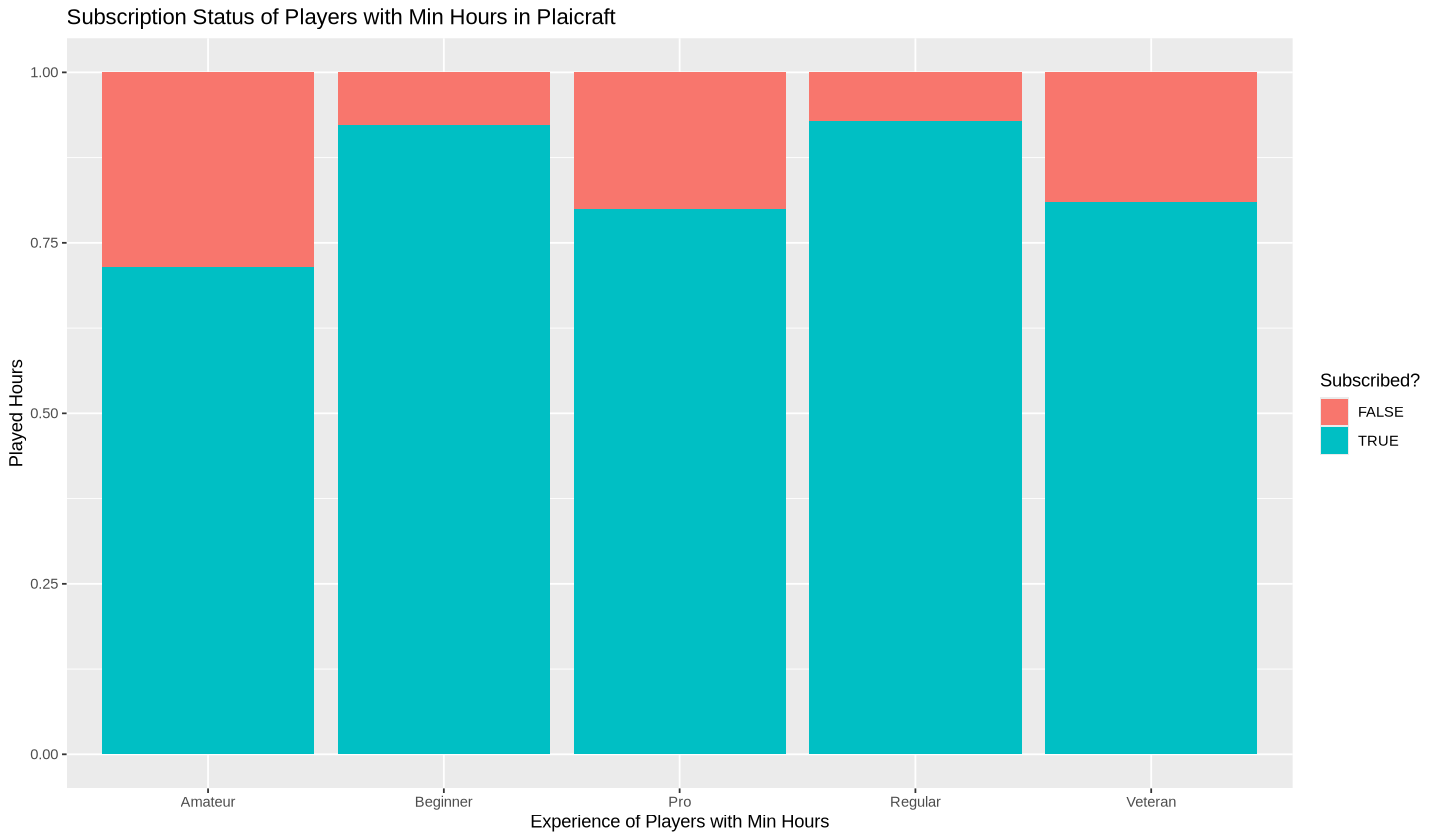

In [119]:
 # 5 Comparing the subscription status between players with min hours in subscription status

min_players <- players_data |>
    filter(played_hours > 0 & played_hours <= 1) |>
    select(played_hours, experience, subscribe) |>
    arrange(played_hours) 
    
   
    
min_players

min_players_plot <- min_players |>
    ggplot(aes(x = experience, y = played_hours, fill = subscribe)) +
    geom_bar(stat = "identity", position = "fill") +
    labs(x = "Experience of Players with Min Hours", y = "Played Hours", 
         fill = "Subscribed?", title = "Subscription Status of Players with Min Hours in Plaicraft")
min_players_plot

#### Analysis # 5 ####

Beginner and Regular players with minimal hours show high, similar subscription rates. Amateur, Pro, and Veteran players have noticeable unsubscribed segments, with Amateur's distribution being the largest. Unsubscribed players remain around 25% or less of each group.